## Project 3 - Group 11
### Aditya Mohan Kakde, Venkata Subrahmanya Ankit Vennelakanti, Venkata Krishnan Ravichandran
#### Task 2 - Elon Musk Twitter Analysis 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls 'drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_3/Tweet_data/'

2017.csv  2018.csv  2019.csv  2020.csv	2021.csv  2022.csv


In [ ]:
df_tweet=pd.DataFrame(columns=['date','tweet'])
for tweet_year in range(2020,2023):
  file_path = 'drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_3/Tweet_data/' + str(tweet_year)+ '.csv'
  df = pd.read_csv(file_path)
  df= df[['date','tweet']]

  df_tweet=pd.concat([df_tweet,df])
df_tweet

,date,tweet
0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...
1,2020-12-28 18:07:33,@kimpaquette Just meeting with Larry Ellison t...
2,2020-12-28 17:23:51,@richierichhhhh_ Absolutely
3,2020-12-28 17:23:31,What should Tesla do with in-car gaming in an ...
4,2020-12-28 05:39:42,@PPathole @WSJ Absolutely
...,...,...
1023,2022-01-03,https://t.co/LA9hPzVlGx
1024,2022-01-02,Let’s make the roaring 20’s happen!
1025,2022-01-02,Great work by Tesla team worldwide!
1026,2022-01-01,@BLKMDL3 @Tesla 🔥


In [ ]:
df_tweet['year'] = pd.DatetimeIndex(df_tweet['date']).year
df_tweet

,date,tweet,year
0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...,2020
1,2020-12-28 18:07:33,@kimpaquette Just meeting with Larry Ellison t...,2020
2,2020-12-28 17:23:51,@richierichhhhh_ Absolutely,2020
3,2020-12-28 17:23:31,What should Tesla do with in-car gaming in an ...,2020
4,2020-12-28 05:39:42,@PPathole @WSJ Absolutely,2020
...,...,...,...
1023,2022-01-03,https://t.co/LA9hPzVlGx,2022
1024,2022-01-02,Let’s make the roaring 20’s happen!,2022
1025,2022-01-02,Great work by Tesla team worldwide!,2022
1026,2022-01-01,@BLKMDL3 @Tesla 🔥,2022


In [ ]:
df_tweet_dup = df_tweet.copy()

In [ ]:
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].replace(regex='(@\w+)|#|&|!',value='') # Remove mentions and hashtags
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip() # removing urls from tweet column
df_tweet_dup = df_tweet_dup.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')) # Removing emojis from the dataframe
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].str.replace("[^a-zA-Z#]", " ") #Removing Punctuations, Special Charecters, Numbers
df_tweet_dup

<ipython-input-7-39a7d4c94820>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet_dup['tweet'] = df_tweet_dup['tweet'].str.replace(r'\s*https?://\S+(\s+|$)', ' ').str.strip() # removing urls from tweet column
<ipython-input-7-39a7d4c94820>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tweet_dup['tweet'] = df_tweet_dup['tweet'].str.replace("[^a-zA-Z#]", " ") #Removing Punctuations, Special Charecters, Numbers


,date,tweet,year
0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...,2020
1,2020-12-28 18:07:33,Just meeting with Larry Ellison to seek some a...,2020
2,2020-12-28 17:23:51,Absolutely,2020
3,2020-12-28 17:23:31,What should Tesla do with in car gaming in an ...,2020
4,2020-12-28 05:39:42,Absolutely,2020
...,...,...,...
1023,2022-01-03,,2022
1024,2022-01-02,Lets make the roaring s happen,2022
1025,2022-01-02,Great work by Tesla team worldwide,2022
1026,2022-01-01,,2022


In [ ]:
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].replace(r'^s*$', float('NaN'), regex = True) # Dropping the NA Values
df_tweet_dup.dropna(subset=['tweet'], inplace=True)
df_tweet_dup

,date,tweet,year
0,2020-12-28 19:46:18,Entertainment will be critical when cars drive...,2020
1,2020-12-28 18:07:33,Just meeting with Larry Ellison to seek some a...,2020
2,2020-12-28 17:23:51,Absolutely,2020
3,2020-12-28 17:23:31,What should Tesla do with in car gaming in an ...,2020
4,2020-12-28 05:39:42,Absolutely,2020
...,...,...,...
1020,2022-01-03,Reminds me of when I hex edited Ultima V to ge...,2022
1021,2022-01-03,Yay Switzerland,2022
1022,2022-01-03,There is no way to be in touch with voters whe...,2022
1024,2022-01-02,Lets make the roaring s happen,2022


# 1) Compute word frequencies for each year. Exclude the stop words


In [ ]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop = stopwords.words('english')
df_tweet_dup['tweet'] = df_tweet_dup['tweet'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word.lower() not in stop))  ## For excluding stop words

# To tokenize the filtered tweets after removing the stop words
from nltk.tokenize import word_tokenize
nltk.download('punkt')
word_tokens = df_tweet_dup['tweet'].apply(word_tokenize)
df_tweet_dup['tweet'] = word_tokens

df_tweet_dup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,date,tweet,year
0,2020-12-28 19:46:18,"[entertainment, critical, cars, drive]",2020
1,2020-12-28 18:07:33,"[meeting, larry, ellison, seek, advice, back, ...",2020
2,2020-12-28 17:23:51,[absolutely],2020
3,2020-12-28 17:23:31,"[tesla, car, gaming, autonomous, world]",2020
4,2020-12-28 05:39:42,[absolutely],2020
...,...,...,...
1020,2022-01-03,"[reminds, hex, edited, ultima, v, get, final, ...",2022
1021,2022-01-03,"[yay, switzerland]",2022
1022,2022-01-03,"[way, touch, voters, youre, three, generations...",2022
1024,2022-01-02,"[lets, make, roaring, happen]",2022


In [ ]:
df_tweet_dup['year'].unique()  # We can see here that the data consists of tweets from 2010-2022

array(['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2021', '2022'], dtype=object)

In [ ]:
df_tweet_dup = df_tweet_dup.drop(df_tweet_dup[df_tweet_dup.year < '2017'].index)
df_tweet_dup
# Dropping all the values of the years less than 2017 to analyse the tweets between 2017-2022

,date,tweet,year
0,2020-12-28 19:46:18,"[entertainment, critical, cars, drive]",2020
1,2020-12-28 18:07:33,"[meeting, larry, ellison, seek, advice, back, ...",2020
2,2020-12-28 17:23:51,[absolutely],2020
3,2020-12-28 17:23:31,"[tesla, car, gaming, autonomous, world]",2020
4,2020-12-28 05:39:42,[absolutely],2020
...,...,...,...
1020,2022-01-03,"[reminds, hex, edited, ultima, v, get, final, ...",2022
1021,2022-01-03,"[yay, switzerland]",2022
1022,2022-01-03,"[way, touch, voters, youre, three, generations...",2022
1024,2022-01-02,"[lets, make, roaring, happen]",2022


In [ ]:
df_tweet_dup['year'].unique()

array(['2020', '2019', '2018', '2017', '2021', '2022'], dtype=object)

In [ ]:
# df_tweet_dup['year'] = df_tweet_dup['year'].astype(int) # Converting the Year to int

In [ ]:
df_2017 = df_tweet_dup.loc[df_tweet_dup['year'] == '2017']
df_2018 = df_tweet_dup.loc[df_tweet_dup['year'] == '2018']
df_2019 = df_tweet_dup.loc[df_tweet_dup['year'] == '2019']
df_2020 = df_tweet_dup.loc[df_tweet_dup['year'] == '2020']
df_2021 = df_tweet_dup.loc[df_tweet_dup['year'] == '2021']
df_2022 = df_tweet_dup.loc[df_tweet_dup['year'] == '2022']
#Separating all the data per individual year

# 2) Show top 10 words (for each year) by the highest value of word frequency


Word count for tweets of 2017 - 2022 and top 10 Values

In [ ]:
dict_2017 = {}
for i in df_2017['tweet']:
  for j in i:
    if dict_2017.get(j,0) == 0:
      dict_2017[j]=1
    else:
      dict_2017[j]=dict_2017[j]+1

#dict_2017
freq_2017 = pd.DataFrame.from_dict(dict_2017,orient ='index')
freq_2017.columns = ['Count']
freq_2017 = freq_2017.sort_values(by='Count', ascending = False)
freq_2017.reset_index(inplace=True)
f_2017 = freq_2017.head(10)
f_2017

,index,Count
0,amp,86
1,tesla,74
2,model,59
3,yes,54
4,good,53
5,like,49
6,one,46
7,next,43
8,first,43
9,yeah,39


In [ ]:
dict_2018 = {}
for i in df_2018['tweet']:
  for j in i:
    if dict_2018.get(j,0) == 0:
      dict_2018[j]=1
    else:
      dict_2018[j]=dict_2018[j]+1

#dict_2018
freq_2018 = pd.DataFrame.from_dict(dict_2018,orient ='index')
freq_2018.columns = ['Count']
freq_2018 = freq_2018.sort_values(by='Count', ascending = False)
freq_2018.reset_index(inplace=True)
#freq_2018
f_2018 = freq_2018.head(10)
f_2018

,index,Count
0,amp,525
1,tesla,290
2,car,120
3,yes,108
4,good,103
5,model,98
6,like,95
7,would,76
8,dont,74
9,people,73


In [ ]:
dict_2019 = {}
for i in df_2019['tweet']:
  for j in i:
    if dict_2019.get(j,0) == 0:
      dict_2019[j]=1
    else:
      dict_2019[j]=dict_2019[j]+1

#dict_2019
freq_2019 = pd.DataFrame.from_dict(dict_2019,orient ='index')
freq_2019.columns = ['Count']
freq_2019 = freq_2019.sort_values(by='Count', ascending = False)
freq_2019.reset_index(inplace=True)
#freq_2019
f_2019 = freq_2019.head(10)
f_2019

,index,Count
0,amp,493
1,tesla,257
2,yes,154
3,would,98
4,great,97
5,starship,94
6,like,87
7,good,85
8,high,75
9,much,75


In [ ]:
dict_2020 = {}
for i in df_2020['tweet']:
  for j in i:
    if dict_2020.get(j,0) == 0:
      dict_2020[j]=1
    else:
      dict_2020[j]=dict_2020[j]+1

#dict_2020
freq_2020 = pd.DataFrame.from_dict(dict_2020,orient ='index')
freq_2020.columns = ['Count']
freq_2020 = freq_2020.sort_values(by='Count', ascending = False)
freq_2020.reset_index(inplace=True)
#freq_2020
f_2020 = freq_2020.head(10)
f_2020

,index,Count
0,amp,575
1,tesla,189
2,yes,160
3,great,128
4,much,120
5,good,112
6,would,92
7,high,91
8,sure,88
9,yeah,83


In [ ]:
dict_2021 = {}
for i in df_2021['tweet']:
  for j in i:
    if dict_2021.get(j,0) == 0:
      dict_2021[j]=1
    else:
      dict_2021[j]=dict_2021[j]+1

#dict_2021
freq_2021 = pd.DataFrame.from_dict(dict_2021,orient ='index')
freq_2021.columns = ['Count']
freq_2021 = freq_2021.sort_values(by='Count', ascending = False)
freq_2021.reset_index(inplace=True)
#freq_2021
f_2021 = freq_2021.head(10)
f_2021

,index,Count
0,amp,473
1,tesla,208
2,great,102
3,good,98
4,much,93
5,haha,89
6,like,89
7,would,88
8,time,86
9,beta,77


In [ ]:
dict_2022 = {}
for i in df_2022['tweet']:
  for j in i:
    if dict_2022.get(j,0) == 0:
      dict_2022[j]=1
    else:
      dict_2022[j]=dict_2022[j]+1

#dict_2022
freq_2022 = pd.DataFrame.from_dict(dict_2022,orient ='index')
freq_2022.columns = ['Count']
freq_2022 = freq_2022.sort_values(by='Count', ascending = False)
freq_2022.reset_index(inplace=True)
#freq_2022
f_2022 = freq_2022.head(10)
f_2022

,index,Count
0,amp,80
1,tesla,62
2,people,34
3,yes,32
4,one,30
5,would,30
6,starlink,28
7,good,28
8,car,26
9,high,22


# 3) Plot histogram of word frequencies for each year

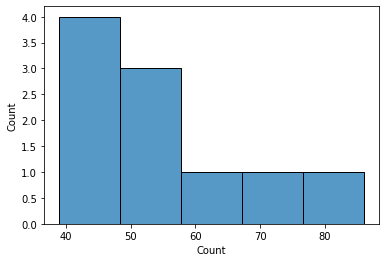

In [ ]:
import seaborn as sns
sns.histplot(data = f_2017, x= 'Count')

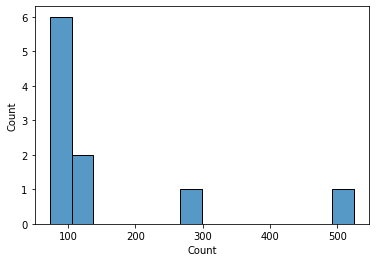

In [ ]:
import seaborn as sns
sns.histplot(data = f_2018, x= 'Count')

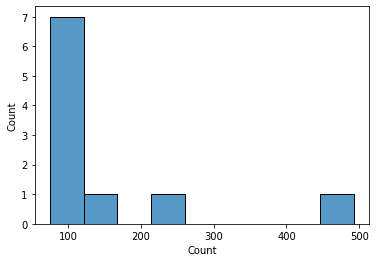

In [ ]:
import seaborn as sns
sns.histplot(data = f_2019, x= 'Count')

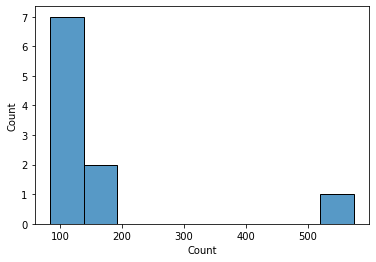

In [ ]:
import seaborn as sns
sns.histplot(data = f_2020, x= 'Count')

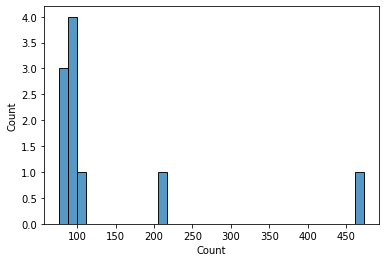

In [ ]:
import seaborn as sns
sns.histplot(data = f_2021, x= 'Count')

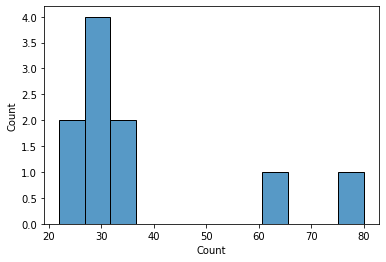

In [ ]:
import seaborn as sns
sns.histplot(data = f_2022, x= 'Count')

# 4) Use Zipf’s law and plot log-log plots of word frequencies and rank for each year


Zips's law = (Count of a word)/(Count of all words in that year)

In [ ]:
sum_2017 = freq_2017.Count.sum()
sum_2017

freq_2017['Zipf law'] = freq_2017['Count']/sum_2017  # Zipf's law
freq_2017['Rank'] = freq_2017['Count'].rank(ascending=False,method='dense')  # Calculating the rank of the words based on frequency
print(freq_2017)

sns.lineplot(data = freq_2017 , x = 'Rank', y= 'Zipf law')  # Plotting

NameError: ignored

In [ ]:
sum_2018 = freq_2018.Count.sum()
sum_2018

freq_2018['Zipf law'] = freq_2018['Count']/sum_2018
freq_2018['Rank'] = freq_2018['Count'].rank(ascending=False,method='dense')
print(freq_2018)

sns.lineplot(data = freq_2018 , x = 'Rank', y= 'Zipf law')

In [ ]:
sum_2019 = freq_2019.Count.sum()
sum_2019

freq_2019['Zipf law'] = freq_2019['Count']/sum_2019
freq_2019['Rank'] = freq_2019['Count'].rank(ascending=False,method='dense')
print(freq_2019)

sns.lineplot(data = freq_2019 , x = 'Rank', y= 'Zipf law')

In [ ]:
sum_2020 = freq_2020.Count.sum()
sum_2020

freq_2020['Zipf law'] = freq_2020['Count']/sum_2020
freq_2020['Rank'] = freq_2020['Count'].rank(ascending=False,method='dense')
print(freq_2020)

sns.lineplot(data = freq_2020 , x = 'Rank', y= 'Zipf law')

In [ ]:
sum_2021 = freq_2021.Count.sum()
sum_2021

freq_2021['Zipf law'] = freq_2021['Count']/sum_2021
freq_2021['Rank'] = freq_2021['Count'].rank(ascending=False,method='dense')
print(freq_2021)
sns.lineplot(data = freq_2021 , x = 'Rank', y= 'Zipf law')

In [ ]:
sum_2022 = freq_2022.Count.sum()
sum_2022

freq_2022['Zipf law'] = freq_2022['Count']/sum_2022
freq_2022['Rank'] = freq_2022['Count'].rank(ascending=False,method='dense')
freq_2022

In [ ]:
sns.lineplot(data = freq_2022 , x = 'Rank', y= 'Zipf law')

# 5) Bigrams Network 


In [ ]:
from itertools import combinations
import itertools
df_2017['bigrams'] = df_2017.tweet.apply(lambda x: list(tuple(sorted(pair)) for pair in combinations(x,2)))
df_2018['bigrams'] = df_2018.tweet.apply(lambda x: list(tuple(sorted(pair)) for pair in combinations(x,2)))
df_2019['bigrams'] = df_2019.tweet.apply(lambda x: list(tuple(sorted(pair)) for pair in combinations(x,2)))
df_2020['bigrams'] = df_2020.tweet.apply(lambda x: list(tuple(sorted(pair)) for pair in combinations(x,2)))
df_2021['bigrams'] = df_2021.tweet.apply(lambda x: list(tuple(sorted(pair)) for pair in combinations(x,2)))
df_2022['bigrams'] = df_2022.tweet.apply(lambda x: list(tuple(sorted(pair)) for pair in combinations(x,2)))



<ipython-input-52-4d243c694396>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['bigrams'] = df_2017.tweet.apply(lambda x: list(tuple(sorted(pair)) for pair in combinations(x,2)))
<ipython-input-52-4d243c694396>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['bigrams'] = df_2018.tweet.apply(lambda x: list(tuple(sorted(pair)) for pair in combinations(x,2)))
<ipython-input-52-4d243c694396>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [ ]:
df_2017['bigrams']

8550                                     [(coming, soon)]
8551    [(better, vastly), (maps, vastly), (nav, vastl...
8552                                                   []
8553                                                   []
8554    [(terrible, yeah), (upgrade, yeah), (old, yeah...
                              ...                        
9706    [(good, looks), (hw, looks), (autopilot, looks...
9707    [(new, rev), (autopilot, new), (hw, new), (new...
9708                                      [(game, great)]
9709                                                   []
9710    [(firing, hold), (falcon, hold), (hold, vanden...
Name: bigrams, Length: 1153, dtype: object

In [ ]:
df_2018['bigrams']

6262    [(everyone, hope), (happy, hope), (hope, new),...
6263           [(happy, new), (happy, year), (new, year)]
6264    [(good, summary), (good, tesla), (good, progre...
6265    [(tesla, thanks), (owners, thanks), (china, th...
6266    [(take, turns), (dayquil, turns), (exit, turns...
                              ...                        
8544                                                   []
8545    [(gon, na), (gon, put), (gon, old), (gon, scho...
8547    [(falcon, heavy), (falcon, goes), (falcon, ver...
8548    [(neural, using), (net, using), (detect, using...
8549    [(come, work), (biggest, come), (amp, come), (...
Name: bigrams, Length: 2220, dtype: object

In [ ]:
df_2019['bigrams']

3330                                        [(bit, slow)]
3331                                       [(ready, yet)]
3332                                                   []
3333    [(tesla, thanks), (club, thanks), (members, th...
3334    [(peace, rest), (rest, syd), (mead, rest), (ar...
                              ...                        
6257    [(great, work), (great, tesla), (great, team),...
6258                            [(congratulations, team)]
6259                                                   []
6260                                                   []
6261                                                   []
Name: bigrams, Length: 2818, dtype: object

In [ ]:
df_2020['bigrams']

0       [(critical, entertainment), (cars, entertainme...
1       [(larry, meeting), (ellison, meeting), (meetin...
2                                                      []
3       [(car, tesla), (gaming, tesla), (autonomous, t...
4                                                      []
                              ...                        
3325    [(people, talk), (people, products), (love, pe...
3326    [(built, wow), (first, wow), (server, wow), (r...
3327    [(congratulations, tesla), (amp, congratulatio...
3328    [(one, suspected), (disguise, one), (disguise,...
3329                                     [(carlos, gone)]
Name: bigrams, Length: 3133, dtype: object

In [ ]:
df_2021['bigrams']

0                                                      []
1       [(many, ui), (improvements, many), (coming, ma...
2              [(big, chart), (chart, deal), (big, deal)]
3       [(macroeconomics, predicting), (challenging, p...
4       [(guide, history), (history, many), (history, ...
                              ...                        
3110    [(responsible, tesla), (personal, tesla), (amp...
3111    [(proud, tesla), (proud, team), (achieving, pr...
3112    [(giant, um), (fusion, um), (reactor, um), (sk...
3113    [(full, tesla), (self, tesla), (driving, tesla...
3114    [(dojo, isnt), (dojo, needed), (dojo, make), (...
Name: bigrams, Length: 2779, dtype: object

In [ ]:
df_2022['bigrams']

0       [(free, way), (qa, way), (haha, way), (free, q...
1       [(beautiful, home), (beautiful, life), (home, ...
2       [(starlink, terminals), (near, starlink), (con...
3                                                      []
4       [(news, sources), (news, partially), (news, pr...
                              ...                        
1020    [(hex, reminds), (edited, reminds), (reminds, ...
1021                                 [(switzerland, yay)]
1022    [(touch, way), (voters, way), (way, youre), (t...
1024    [(lets, make), (lets, roaring), (happen, lets)...
1025    [(great, work), (great, tesla), (great, team),...
Name: bigrams, Length: 850, dtype: object

### Bigram network plots

In [ ]:
!pip uninstall networkx -y
!pip install networkx==2.4
import networkx as nx
import matplotlib.pyplot as plt

Found existing installation: networkx 2.4
Uninstalling networkx-2.4:
  Successfully uninstalled networkx-2.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.4-py3-none-any.whl (1.6 MB)


In [ ]:
bigrams_2022 = list(itertools.chain(*df_2022['bigrams']))
bigrams_df_2022 = pd.DataFrame(bigrams_2022,columns=['source','destination'])

bigrams_2017 = list(itertools.chain(*df_2017['bigrams']))
bigrams_df_2017 = pd.DataFrame(bigrams_2017,columns=['source','destination'])

bigrams_2018 = list(itertools.chain(*df_2018['bigrams']))
bigrams_df_2018 = pd.DataFrame(bigrams_2018,columns=['source','destination'])

bigrams_2019 = list(itertools.chain(*df_2019['bigrams']))
bigrams_df_2019 = pd.DataFrame(bigrams_2019,columns=['source','destination'])

bigrams_2020 = list(itertools.chain(*df_2020['bigrams']))
bigrams_df_2020 = pd.DataFrame(bigrams_2020,columns=['source','destination'])

bigrams_2021 = list(itertools.chain(*df_2021['bigrams']))
bigrams_df_2021 = pd.DataFrame(bigrams_2021,columns=['source','destination'])


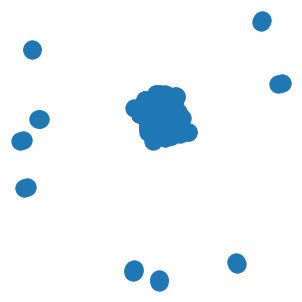

In [ ]:
# For 2017
G = nx.Graph()
G = nx.from_pandas_edgelist(bigrams_df_2017, source='source', target='destination')
plt.figure(figsize =(4, 4))
nx.draw(G)

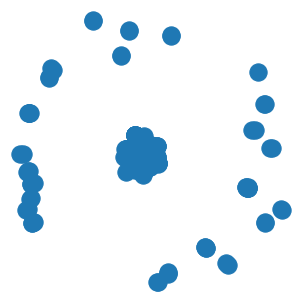

In [ ]:
# For 2018
G = nx.Graph()
G = nx.from_pandas_edgelist(bigrams_df_2018, source='source', target='destination')
plt.figure(figsize =(4, 4))
nx.draw(G)

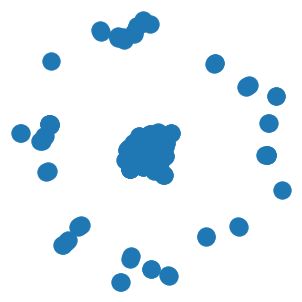

In [ ]:
# For 2019
G = nx.Graph()
G = nx.from_pandas_edgelist(bigrams_df_2019, source='source', target='destination')
plt.figure(figsize =(4, 4))
nx.draw(G)

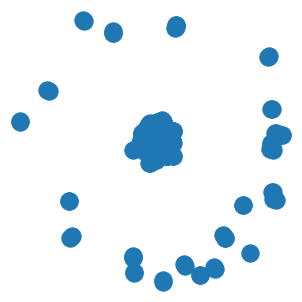

In [ ]:
# For 2020
G = nx.Graph()
G = nx.from_pandas_edgelist(bigrams_df_2020, source='source', target='destination')
plt.figure(figsize =(4, 4))
nx.draw(G)

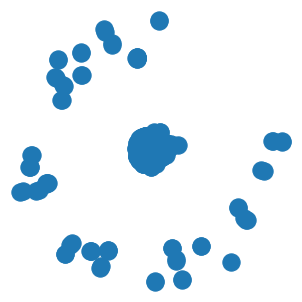

In [ ]:
# For 2021
G = nx.Graph()
G = nx.from_pandas_edgelist(bigrams_df_2021, source='source', target='destination')
plt.figure(figsize =(4, 4))
nx.draw(G)

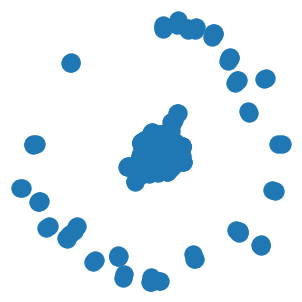

In [ ]:
# For 2022
G = nx.Graph()
G = nx.from_pandas_edgelist(bigrams_df_2022, source='source', target='destination')
plt.figure(figsize =(4, 4))
nx.draw(G)